In [2]:
import os
import sys 
import glob
import copy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr
from scipy.interpolate import LinearNDInterpolator
from leakage.velocity_leakage import S1DopplerLeakage
from leakage.add_dca import DCA

## - Load DCA files

In [32]:
data_dir = "/Users/opodriscoll/Documents/Data/Sentinel1/DCA/"
scenarios = glob.glob(f"{data_dir}*")
scenarios = [scenario[scenario.rfind('/')+1:] for scenario in scenarios]
scenarios

['Aghulas_20200309',
 'Aghulas_20200414',
 'Aghulas_20190510',
 'Aghulas_20200121',
 'Aghulas_20191110',
 'Aghulas_20200426',
 'Aghulas_20200402',
 'Aghulas_20190515',
 'Aghulas_20200321']

In [35]:
scenario = 'Aghulas_20200309'
files_dca = glob.glob(f"{data_dir+scenario}/*.nc")
files_dca = [file for file in files_dca if 'S1A' in file]
files_dca

['/Users/opodriscoll/Documents/Data/Sentinel1/DCA/Aghulas_20200309/20200309T173323-WOC-L2P-CUReul-S1A-OSC_RVL-v1.0-fv1.1.nc',
 '/Users/opodriscoll/Documents/Data/Sentinel1/DCA/Aghulas_20200309/20200309T173258-WOC-L2P-CUReul-S1A-OSC_RVL-v1.0-fv1.1.nc',
 '/Users/opodriscoll/Documents/Data/Sentinel1/DCA/Aghulas_20200309/20200309T173233-WOC-L2P-CUReul-S1A-OSC_RVL-v1.0-fv1.1.nc',
 '/Users/opodriscoll/Documents/Data/Sentinel1/DCA/Aghulas_20200309/20200309T173348-WOC-L2P-CUReul-S1A-OSC_RVL-v1.0-fv1.1.nc',
 '/Users/opodriscoll/Documents/Data/Sentinel1/DCA/Aghulas_20200309/20200309T173530-WOC-L2P-CUReul-S1A-OSC_RVL-v1.0-fv1.1.nc',
 '/Users/opodriscoll/Documents/Data/Sentinel1/DCA/Aghulas_20200309/20200309T173412-WOC-L2P-CUReul-S1A-OSC_RVL-v1.0-fv1.1.nc',
 '/Users/opodriscoll/Documents/Data/Sentinel1/DCA/Aghulas_20200309/20200309T173505-WOC-L2P-CUReul-S1A-OSC_RVL-v1.0-fv1.1.nc',
 '/Users/opodriscoll/Documents/Data/Sentinel1/DCA/Aghulas_20200309/20200309T173440-WOC-L2P-CUReul-S1A-OSC_RVL-v1.0-fv1

In [18]:
1/np.sin(np.deg2rad(50))

1.3054072893322786

## - Load Sentinel-1 files

In [5]:
data_dir = "/Users/opodriscoll/Documents/Data/Sentinel1/IW/"
scenarios = glob.glob(f"{data_dir}*")
scenarios = [scenario[scenario.rfind('/')+1:] for scenario in scenarios]
scenarios = [ scenario for scenario in scenarios if "_" != scenario[0] ] 
scenarios

['Aghulas_20200309',
 'Carrib_20231104',
 'Azores_20201127',
 'Morroco_20201022',
 'Hawaii_20201106',
 'Barbedos_20201110',
 'Aghulas_20200414',
 'Morroco_20201103',
 'Brasilia_20200402',
 'Aghulas_20200121',
 'Brasilia_20200321',
 'Aghulas_20191110',
 'Iceland_20231107',
 'Aghulas_20200426',
 'Scotland_20231109',
 'Aghulas_20200402',
 'Morroco_20201115',
 'Aghulas_20190515',
 'Aghulas_20200321']

In [6]:
files = glob.glob(f"{data_dir+scenario}/*.SAFE")

observation = S1DopplerLeakage(
    filename=files,
    z0 = 823_000,
    era5_directory='../../data/leakage/era5_winds/',
    resolution_product=25_000,
    az_footprint_cutoff=80_000,
    vx_sat=6_800,
    PRF=4,
    grid_spacing=150,
    antenna_length=2.87,
    antenna_height=0.32,
    beam_pattern='phased_array',
    antenna_elements=4,
    antenna_weighting=0.5,
    swath_start_incidence_angle_scat=30,
    boresight_elevation_angle_scat=40,
    random_state = 42,
    fill_nan_limit = None,
    )

/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:174: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


In [7]:
observation.apply()

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20190515/380C_A15C_E78E_EF27_FA2B_res150.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20190515h1700_lat-37_38_lon20_92.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/stereoid/oceans/GMF/cmod5n.py:104: RuntimeWarning: invalid value encountered in power
  a3[SlS0] = a3[SlS0] * (s[SlS0] / s0[SlS0]) ** (s0[SlS0] * (1.0 - a3[SlS0]))
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/stereoid/oceans/GMF/cmod5n.py:104: RuntimeWarning: invalid value encountered in power
  a3[SlS0] = a3[SlS0] * (s[SlS0] / s0[SlS0]) ** (s0[SlS0] * (1.0 - a3[SlS0]))


In [8]:
obj_copy = copy.deepcopy(observation)

## - Interpolate and add DCA to Sentinel-1

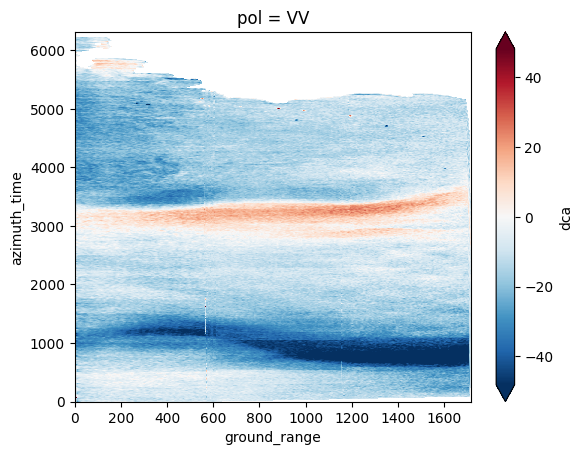

In [9]:
dca_interp = DCA(filenames=files_dca,
    latitudes=obj_copy.S1_file.latitude.values,
    longitudes=obj_copy.S1_file.longitude.values).add_dca()

obj_copy.S1_file['dca'] = (['azimuth_time', 'ground_range'], dca_interp)

obj_copy.S1_file.dca.plot(robust = True)

In [10]:
obj_copy.create_dataset()
obj_copy.data['dca_s1'] = (['az', 'grg'], obj_copy.S1_file['dca'].data)
obj_copy.create_beam_mask()

/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/stereoid/oceans/GMF/cmod5n.py:104: RuntimeWarning: invalid value encountered in power
  a3[SlS0] = a3[SlS0] * (s[SlS0] / s0[SlS0]) ** (s0[SlS0] * (1.0 - a3[SlS0]))


The Sentinel-1 DCA data is provided in radial velocity w.r.t. the sensor: DCA_radial. Therefore, it must first be corrected to the radial velocity in the scatterometer's line of sight: 


\begin{equation}
    \mathrm{DCA}_{\mathrm{scatt}} = \frac{\mathrm{DCA}_{\mathrm{radial}} \sin\left(b\right)}{\sin\left(a\right)}
\end{equation}

where $a$ is the incidence angle of Sentinel-1 and $b$ that of the scatterometer

In [24]:
numerator = obj_copy.data['dca_s1'] * np.sin(np.deg2rad(observation.data['inc_scatt_eqv'])) #np.cos(np.deg2rad(90 - observation.data['inc_scatt_eqv']))
denominator = np.sin(np.deg2rad(observation.data['inc']))
obj_copy.data['dca_scatt'] = numerator / denominator

In [26]:
# compute weighted received Doppler and resulting apparent LOS velocity
observation.data['dop_beam_weighted_w_dca'] = (obj_copy.data.dca_scatt + observation.data['dop_geom']) * observation.data['beam']* observation.data['nrcs_weight']
observation.data['dca_beam_weighted'] = obj_copy.data.dca_scatt * observation.data['beam'] * observation.data['nrcs_weight']

# sum over azimuth to receive range-slow_time results
weight_rg = (observation.data['beam'] * observation.data['nrcs_weight']).sum(dim='az_idx', skipna=False)
receive_rg = observation.data['dop_beam_weighted_w_dca'].sum(dim='az_idx', skipna=False)
observation.data[['dca_pulse_rg']] = observation.data['dca_beam_weighted'].sum(dim='az_idx', skipna=False) / weight_rg
observation.data[['doppler_w_dca_pulse_rg']] = receive_rg / weight_rg

observation.data['doppler_w_dca_pulse_rg_subscene'] = observation.data['doppler_w_dca_pulse_rg'].rolling(grg=observation.grg_N, slow_time=observation.slow_time_N, center=True).mean()
observation.data['dca_pulse_rg_subscene'] = observation.data['dca_pulse_rg'].rolling(grg=observation.grg_N, slow_time=observation.slow_time_N, center=True).mean()

observation.data = observation.data.transpose('az_idx', 'grg', 'slow_time')

In [27]:
param_to_persist = ['nrcs_scat', 'doppler_pulse_rg_subscene', 'doppler_pulse_rg_subscene_inverted', 'dca_pulse_rg_subscene']
observation.data[param_to_persist] = observation.data[param_to_persist].persist()

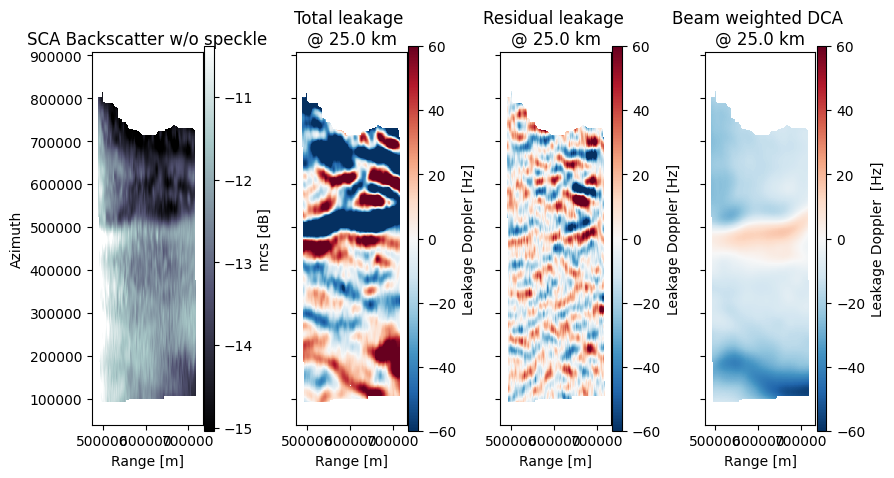

In [28]:
cbar_kwargs = {'shrink':0.5, 'aspect':40, 'pad' : 0.01, 'extend':'neither'}
plot_kwargs = {'robust': True}
plot_leakage_kwargs = {'vmin': -60, 'vmax': 60, 'cmap' : 'RdBu_r'}
plot_leakage_net_kwargs = {'vmin': -2, 'vmax': 2, 'cmap' : 'PiYG'}
label_kwargs = {'xlabel':'Range [m]', 'ylabel':'Azimuth [m]'}

net_leakage = observation.data['doppler_pulse_rg_subscene']- observation.data['doppler_pulse_rg_subscene_inverted']

fact_1 = (observation.data['dca_pulse_rg_subscene']/observation.data['dca_pulse_rg_subscene']) * (net_leakage/net_leakage)

nx = 4; ny = 1
fig, axes = plt.subplots(ny, nx, figsize = (9, 8), sharex=True, sharey=True)

(10*np.log10(observation.data['nrcs_scat']) * fact_1).T.plot(ax= axes[0], 
                                          **{'cmap': 'bone', **plot_kwargs},
                                          cbar_kwargs = {'label':'nrcs [dB]', **cbar_kwargs})
(observation.data['doppler_pulse_rg_subscene']*fact_1).T.plot(ax= axes[1], 
                                                  **{**plot_leakage_kwargs},
                                                  cbar_kwargs = {'label':'Leakage Doppler [Hz]', **cbar_kwargs})
(net_leakage*fact_1).T.plot(ax= axes[2], 
                                                  **{**plot_leakage_kwargs},
                                                  cbar_kwargs = {'label':'Leakage Doppler [Hz]', **cbar_kwargs})
(observation.data['dca_pulse_rg_subscene']*fact_1).T.plot(ax= axes[3], 
                                             **{**plot_leakage_kwargs, **plot_kwargs},
                                             cbar_kwargs = {'label':'Leakage Doppler  [Hz]', **cbar_kwargs})
# (observation.data['dca_pulse_rg_subscene'] + net_leakage).T.plot(ax= axes[3],
#                     **{**plot_leakage_kwargs, **plot_kwargs},
#                     cbar_kwargs = {'label':'Leakage Doppler [Hz]', **cbar_kwargs})


res = observation.resolution_product/1000
titles = ['SCA Backscatter w/o speckle', f'Total leakage \n@ {res:2} km', f'Residual leakage \n@ {res:2} km', f'Beam weighted DCA \n@ {res:2} km']
x_labels = ['Range [m]'] * nx
y_labels = ['Azimuth'] + [''] * (nx - ny)
_ = [ax.axes.set_title(i) for ax, i in zip(axes.ravel(), titles)]
_ = [ax.axes.set_xlabel(i) for ax, i in zip(axes.ravel(), x_labels)]
_ = [ax.axes.set_ylabel(i) for ax, i in zip(axes.ravel(), y_labels)]
_ = [ax.axes.set_aspect('equal') for ax in axes.ravel()]

plt.tight_layout()

In [29]:
np.sqrt(np.mean(observation.data['dca_pulse_rg_subscene']**2)).compute()

<xarray.DataArray 'dca_pulse_rg_subscene' ()> Size: 8B
array(19.22152023)